# パーセプトロン

このノートで使うパッケージをimportしておきましょう．

In [352]:
# packageのimport
from typing import Any, Union, Callable, Type, TypeVar
import numpy as np 
import numpy.typing as npt
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import japanize_matplotlib

In [353]:
plt.style.use("bmh")

## 動物の神経系との関係

人工ニューラルネットワーク（ANN; Artificial Neural Network）は，生物の学習メカニズムを模倣した機械学習の一手法として知られています．この人工ニューラルネットワークは単にニューラルネットワークとも呼ばれていますが，人間を初めとした動物の脳内に存在するニューラルネットワークをそのまま不足無く再現した数理モデルではありません．以下に生物学的なニューロン（ニューラルネットワークを構成する細胞）の構造を示します．

> ![Neuron Diagram & Types | Ask A Biologist https://askabiologist.asu.edu/neuron-anatomy ](https://askabiologist.asu.edu/sites/default/files/resources/articles/neuron_anatomy.jpg)  
生物学的なニューロンの構造．出典： [Neuron Diagram & Types | Ask A Biologist](https://askabiologist.asu.edu/neuron-anatomy)

>![「ディープラーニングがわかる数学入門」P.11](https://starpentagon.net/analytics/wp-content/uploads/2017/09/neuron.png)  
> 生物学的なニューロンの信号伝搬の仕組み．出典: 「[ディープラーニングがわかる数学入門](https://www.amazon.co.jp/%E3%83%87%E3%82%A3%E3%83%BC%E3%83%97%E3%83%A9%E3%83%BC%E3%83%8B%E3%83%B3%E3%82%B0%E3%81%8C%E3%82%8F%E3%81%8B%E3%82%8B%E6%95%B0%E5%AD%A6%E5%85%A5%E9%96%80-%E6%B6%8C%E4%BA%95-%E8%89%AF%E5%B9%B8/dp/477418814X)」P.11 

> ![](https://cz-cdn.shoeisha.jp/static/images/article/13501/13501_02.jpg)  
人工ニューロンの一例．出典：[ディープラーニングと脳の関係とは？ 人工ニューロンや再帰型ニューラルネットワークを解説|CodeZine（コードジン）](https://codezine.jp/article/detail/13501)  
> また，この記事は『[あたらしい脳科学と人工知能の教科書](https://www.amazon.co.jp/dp/479816495X?tag=searticle1-22)』の「Chapter4　脳と人工知能」から一部を抜粋し編集されたもの．

ニューロンはニューラルネットワークを構成する要素であり，これが何個も集まり多層になったものがニューラルネットワークの中でも深層学習（Deep Learning，特にDNN; Deep Neural Network）と呼ばれるものです．この説明だとDeep Learningの説明としては不足ですが，まずはDeep Learning理解ための第一歩なのだと思っていただければ間違いありません．

## 単純パーセプトロン

### 単純パーセプトロンの基礎

単純パーセプトロンは上記で示した図のような数理モデルです．ニューロンは外部刺激を受けた際に，入力値がある閾値（"しきいち"と読みます．別の分野では"いきち"と読ませる場合もあり，英語ではthresholdと書きます）を超えた際に，次のニューロンに対して出力信号を返します．ここではこれを使って，二値クラス分類を行う例を考えていきます．

単純パーセプトロンの数理モデルを導入するために，まずはデータの準備を行います．個々の訓練データは$(X,y)$という形をしているとします．ここで$X=[x_1,\cdots, x_d]$であり$X$は$d$個の特徴量変数を含んだ行ベクトルです．（通常列ベクトルで書く方が多いのかもしれませんが，[PyTorch](https://pytorch.org/)を初めとしたPythonのDeep Learning Frameworkとの親和性を考えてこのようにしています．）$y \in \{0,1\}$は2値のクラス変数の観測値です．

```{hint}
統計学の分野では特徴量を説明変数，クラス変数を目的変数とも呼びます．
```
ここで単純パーセプトロンの模式図を再掲します．
> ![](https://cz-cdn.shoeisha.jp/static/images/article/13501/13501_02.jpg)  
人工ニューロンの一例．ただし，図は[ディープラーニングと脳の関係とは？ 人工ニューロンや再帰型ニューラルネットワークを解説|CodeZine（コードジン）](https://codezine.jp/article/detail/13501) より引用した．また，この記事は『[あたらしい脳科学と人工知能の教科書](https://www.amazon.co.jp/dp/479816495X?tag=searticle1-22)』の「Chapter4　脳と人工知能」から一部を抜粋し編集されたもの．

この図における"入力"に相当するのが$X$です．また，図のそれぞれの入力は，そのデータの特徴量に対応し，この入力の数は特徴量の数に設定します．それと同じ数だけある"重み"に相当するのは$W=[w_1,\cdots, w_d]$です．これはそれぞれの入力の重要度を重み付けるために用いられるので， __結合重み__ や単に __重み__ と言われます．パーセプトロンでは入力と，これにそれぞれ対応した重みがあり，これらの重み付き和がニューロンに入ります．その後何かしらの活性化関数に適用することで出力$\hat{y}\in \{0,1\}$を得ます．

```{hint}
$\hat{y}$はワイハット，またはワイカレットなどと読みます．
```


ここまでを式で表してみます．

$$
\hat{y} = \operatorname{sign}\{W\cdot X\}=\operatorname{sign}\{\sum_{j=1}^{d}w_j x_j\}
$$

ここで活性化関数として，[符号関数$\operatorname{sign}$](https://mathlandscape.com/sign-function/)（この他に$\operatorname{step}$関数とも呼ばれます．）を使います．$\operatorname{sign}$の定義は以下：

$$
\operatorname{sign}\{x\}=\operatorname{sgn}\{x\}= 
    \begin{cases}
    1 &  \text{if}~ x > 0  \\ 
    0 &  \text{if}~ x \leq 0 
    \end{cases}
$$

ただし，ここで$x$は適当な入力値という意味であり，$X$とは関係が無いことに注意してください．また，ここでは等号がどちらのcaseについているのかについても然程重要ではありません．（0以下の場合に0を返すのか-1を返すのかも，ブレがあるようです．-1を返すのが主流だと思いますが，ここでは解説の都合上0を採用します．）

In [354]:
def sign(x):
    # 単にreturn float(x>0)としてもOKです．
    if x > 0:
        return 1.
    return 0.

def sign(x:np.ndarray):
    return (x > 0).astype(x.dtype)

x = np.linspace(-10,10,200)
fig = px.scatter(x=x, y=sign(x), title="sign関数", height=500,width=500)
fig.update_xaxes(title=dict(text='入力 x'))
fig.update_yaxes(title=dict(text='出力 sign(x)'))

sign関数は入力値が0以下の場合と正の数になった場合とで値が変わります．そのため連続な関数では無いことに注意してください．

### biasの導入

このsign関数の閾値は常に$0$に設定されていますが，場合によっては値を変更したくなるかもしれません．そのような場合に有効なのがbias $b\in \mathbb{R}$です．これを活性化関数の入力値に対して加算することで，閾値の操作が可能です．

$$
\hat{y} = \operatorname{sign}\{W\cdot X + b\}=\operatorname{sign}\{\sum_{j=1}^{d}(w_j x_j)+ b\}
$$

この式を使うと，パーセプトロンの条件分岐は以下のようになります．

$$
\operatorname{perceptron}\{x;W,b\}= 
    \begin{cases}
    1 &  \text{if}~ W\cdot X + b > 0  \\
    0 &  \text{if}~ W\cdot X + b \leq 0 
    \end{cases} 
$$
$b$を移項するとより分かりやすいかも知れません．

$$
\operatorname{perceptron}\{x;W,b\}=
    \begin{cases}
    1 &  \text{if}~ W\cdot X  > -b  \\ 
    0 &  \text{if}~ W\cdot X  \leq -b 
    \end{cases}
$$

## 実装

Pythonを使った単純パーセプトロンの実装は以下のようになります．

### 行列計算を用いない実装

パーセプトロンの図を思い出してください．入力される特徴量変数$x_i (i = 1,2,...d)$ の一つ一つに対して，対応する$w_i$が乗算されます．その後これらを合計し，$b$を加算することでニューロンへの入力値が求められました．その後は閾値を超えているかをチェックし，1 or 0を返す処理を行います．それをpure pythonで実装した例が以下です．

In [355]:
def sign(x:float)->float:
    # 単にreturn float(x>0)としてもOKです．
    if x > 0:
        return 1.
    return 0.

def perceptron(X:list[float], W:list[float],b:float)->float:
    h = 0.
    for _x, _w in zip(X,W):
        h += _x * _w
    h += b
    return sign(h)

W = np.random.random([3])
b = 0.2
X = np.random.random([3])
perceptron(X, W,b)

1.0

### 行列計算を用いた実装

重み付き総和の計算は，$X$と$W$のdot積で求まります．後は$b$を加算し，sign関数を適用するだけでOKです．  
ただし，以下のコードの
```py
np.dot(W,X)
```
において，WとXはベクトルや一次元配列が期待されていることに注意してください．これらオブジェクトがnp.ndarrayである場合，shapeは(3)であり，(1,3)や(3,1)ではありません．この違いを理解しておかないと，このコード（特にnp.dot関数）は正しく動作しないでしょう．

In [364]:
def sign(X:np.ndarray)->float:
    return (X > 0).astype(x.dtype)

def perceptron(X:npt.ArrayLike, W:npt.ArrayLike, b:float)->float:
    h = np.dot(W,X) + b
    return sign(h)


W = np.random.random([3])
b = 0.2
X = np.random.random([3])
perceptron(X, W,b)

1

## 実験

### ORゲート

単純パーセプトロンの能力を紹介するために，実装したperceptron関数を利用して論理回路を再現してみます．

In [357]:
truth_table = pd.DataFrame(
    np.array([[1,1,0,0],[1,0,1,0]]).T,
    columns=["x1","x2"]
)
truth_table["or"] = truth_table.x1 | truth_table.x2
truth_table["and"] = truth_table.x1 & truth_table.x2
truth_table["xor"] = np.logical_xor(truth_table.x1,truth_table.x2).astype(truth_table.x1.dtype)
print("真偽値表")
truth_table

真偽値表


,x1,x2,or,and,xor
0,1,1,1,1,0
1,1,0,1,0,1
2,0,1,1,0,1
3,0,0,0,0,0


ここで，真偽値表のx1列，x2列がパーセプトロンに入力される特徴量です．一行ずつ取り出して，or，andの値をそれぞれ予測してみましょう．

まずはorを再現してみます．

In [358]:
X = truth_table[["x1","x2"]].to_numpy()
Y = truth_table["or"].to_numpy()
Y_hat = []

W = np.array([0.2, 0.2]) # 適当な2値で埋めた重みベクトル
b = -0.1 # 適当なスカラ値

for x in X:
    y_hat = perceptron(x,W,b)
    Y_hat.append(y_hat)

print("or回路")
print("正答:",Y.tolist())
print("予測:",Y_hat)

or回路
正答: [1, 1, 1, 0]
予測: [1, 1, 1, 0]


or回路をパーセプトロンがどのように再現したのかをグラフで確認してみましょう．パーセプトロンの獲得した識別境界の式を用意します．

$$
\hat{y} =\operatorname{sign}\{\sum_{j=1}^{2}(w_j x_j)+ b\} = \operatorname{sign}\{w_1x_1+w_2x_2+b\}
$$
この式のsign関数の引数に着目し，$x_2$に対しての式に直します．
$$
x_2 = \frac{w_1x_1+b}{-w_2}
$$

これを使って識別境界（閾値）を散布図上にプロットします．（$x_1=0$時の$x_2$と，$x_2=0$時の$x_1$を求めて，2点を繋ぐ直線を引くことでも識別境界をプロットできます．）


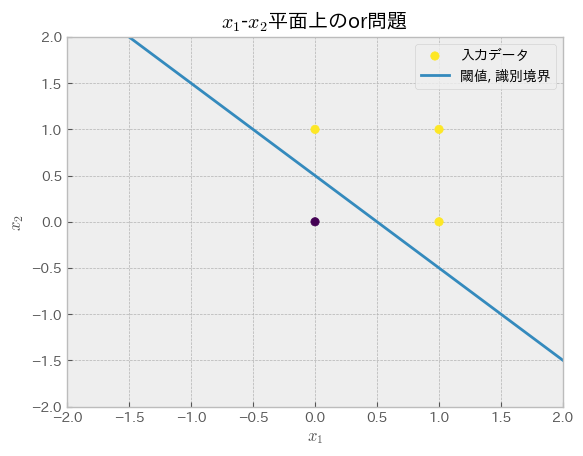

In [359]:
def plot_perceptron(w,b, truth_table, gate_type="or", need_output=False):
    linear = lambda x1,w,b: -(w[0]*x1 + b)/w[1]
    x1_sample = np.linspace(-2,2,100)

    fig, ax = plt.subplots()
    ax.scatter(truth_table.x1, truth_table.x2, c=truth_table[gate_type], label="入力データ")
    ax.plot(x1_sample, linear(x1_sample, W,b), label="閾値, 識別境界")
    ax.set_title(f"$x_1$-$x_2$平面上の{gate_type}問題")
    ax.set_xlabel("$x_1$")
    ax.set_ylabel("$x_2$")
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    plt.legend()
    #ax.set_aspect('equal')
    if need_output:
        return fig
plot_perceptron(W,b,truth_table,gate_type="or")

境界線の式やプロットから分かる通り，境界線は一本の直線になっています．パーセプトロンを使ったクラス分類はこのような線形分離可能な問題にのみ有効であることがわかります．

### ANDゲート

次はandを再現します．  
以下のセルで，W,bの値を適当に変化させて期待通りの答えを見つけてみてください．

and回路
正答: [1, 0, 0, 0]
予測: [1, 0, 1, 1]


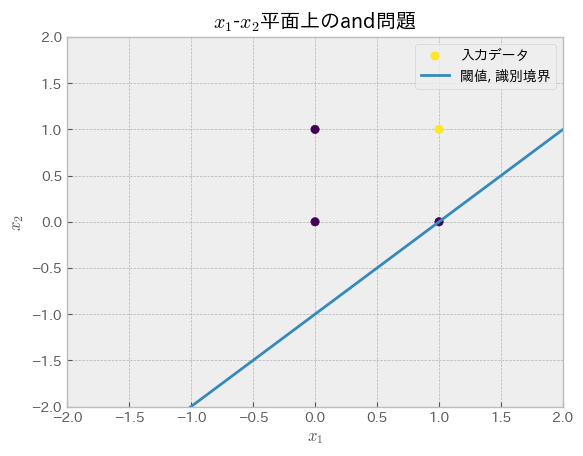

In [360]:
X = truth_table[["x1","x2"]].to_numpy()
Y = truth_table["and"].to_numpy()
Y_hat = []

W = np.array([-1,1]) # 適当な2値で埋めた重みベクトル
b = 1.0 # 適当なスカラ値

for x in X:
    y_hat = perceptron(x,W,b)
    Y_hat.append(y_hat)

print("and回路")
print("正答:",Y.tolist())
print("予測:",Y_hat)

plot_perceptron(W,b,truth_table,gate_type="and")

## パーセプトロンの再考

「学習（データと答えからいい感じのパラメータを自動獲得）できるようにしようぜ」

パーセプトロンには「線形に分離できる場合のみ正しい答えを見つけることができる」という限界があるようですが，それでもその制限の中ならば，$W$と$b$をうまく設定してあげることで自動でクラス分類ができそうです．ここでの$W$と$b$のような変数を __パラメータ(parameters)__ と呼びます．また，これらは後述するように様々なアルゴリズムによりデータとクラスのペアがたくさんあれば自動獲得させることが可能です．そのため __学習可能パラメータ__ と敢えて呼ぶこともあります．

それではパーセプトロンの学習可能パラメータの「いい感じの値」を見つけるアルゴリズムを考えていきましょう．パーセプトロンに対する学習即には，大きくヘブ則とパーセプトロン学習即の二つが知られています．そのうちヘブ則は収束しないことが多いので，疑似コードを使ってこれを見ていきましょう．

![](./figs/perceptron_algo.png)

疑似コードに慣れていない人のために，一行ずつ解説をつけておきます．

- Require（入力）
    - 所与の値として学習率（Learning rate）$r$を指定します．ただし，0より大きい値でしてしましょう．パーセプトロンの場合は1でもOKです．
- Ensure（出力）
    - このアルゴリズムではパラメータ$W,b$を返します．
1. この値について適切な値がわからないので乱数で初期化することにしましょう．まずは適当に標準正規分布に従うものとします．
2. perceptronが全てのデータに対して正しい答えを返すまで以下を繰り返します．
3. データセット$\mathcal{D}$から一つ一つ事例$(x,y)$を取り出し，以下を繰り返します．
4. 現状のパラメータの値を使って，パーセプトロンの出力を計算します．
5. wを更新します．
6. bを更新します．


このアルゴリズムに従ってプログラムを実装し，実際にパラメータが収束するのかを確認してみてください．

```{hint}
実際に実装する時には，WHILEループの終了条件は「全てのパラメータが更新されなくなるまで」でもOKです．さらに，パーセプトロンだと学習の終了まで短時間で終わるので気にしなくても良いですが，普通の機械学習モデルの訓練の場合は，最大epoch数（or 最大更新回数）を設定しておくことが普通です．
```

In [390]:
truth_table[truth_table == 0]=-1

In [391]:
def update_perceptron(X,Y, lr=1, delta=1e-7, rng = np.random.default_rng(10)):
    W = rng.normal(0,1, [X.shape[-1]])
    b = float(rng.normal(0,1, 1))
    _W = np.zeros_like(W)
    _b = 0
    W_diff = np.inf
    b_diff = np.inf
    while not (W_diff<= delta and b_diff <=delta):
        for (x,y) in zip(X,Y):
            y_hat = perceptron(x, W, b)
            _W = W
            _b = b
            W += lr*(y-y_hat)*x
            b += lr*(y-y_hat)
        W_diff = np.mean((W- _W)**2)
        b_diff = (b- _b)**2
    return W, b

gate_type = "and"
W,b = update_perceptron(
    truth_table[["x1","x2"]].to_numpy(),
    truth_table[gate_type].to_numpy(),
    )
plot_perceptron(W,b,truth_table=truth_table, gate_type=gate_type)

Y_hat = []
for x in truth_table[["x1","x2"]].to_numpy():
    y_hat = perceptron(x, W,b)
    Y_hat.append(y_hat)
    print(x, y_hat)
print(truth_table[gate_type].to_numpy(),)
print(Y_hat)

KeyboardInterrupt: 

[1 1] 1
[1 0] 1
[0 1] 1
[0 0] 1
[1 1 1 0]
[1, 1, 1, 1]


## パーセプトロンの限界

XORができないとか何とか